In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df = df.rename(columns = {'Column1' : 'buying','Column2' : 'maint','Column3' : 'doors','Column4' : 'persons','Column5' : 'lug_boot','Column6' : 'safety','Column7' : 'Label'})

In [5]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,Label
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le=LabelEncoder()
for i in df.columns:
    df[i]=le.fit_transform(df[i])

In [8]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,Label
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [9]:
X=df[df.columns[:-1]]
y=df['Label']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Imports

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

### Logistic Regresion

In [12]:
logreg=LogisticRegression(multi_class='multinomial')
logreg.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [13]:
pred=logreg.predict(X_test)
logreg.score(X_test,y_test)

0.6589595375722543

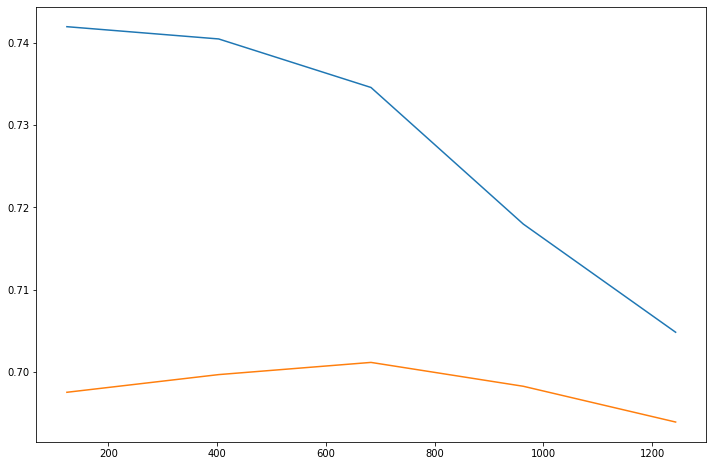

In [14]:

lc=learning_curve(logreg,X_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score)
plt.plot(size,test_score)

In [15]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.26      0.13      0.18        83
           1       0.00      0.00      0.00        11
           2       0.72      0.92      0.81       235
           3       0.00      0.00      0.00        17

    accuracy                           0.66       346
   macro avg       0.25      0.26      0.25       346
weighted avg       0.55      0.66      0.59       346



C:\Users\SHEEL\anaconda3\envs\tf2.4-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SHEEL\anaconda3\envs\tf2.4-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SHEEL\anaconda3\envs\tf2.4-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN Classifier

In [16]:
knn=KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
knn.score(X_test,y_test)

0.8930635838150289

In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        83
           1       0.60      0.55      0.57        11
           2       0.91      1.00      0.96       235
           3       0.86      0.35      0.50        17

    accuracy                           0.89       346
   macro avg       0.81      0.66      0.71       346
weighted avg       0.89      0.89      0.88       346



### Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rfc=RandomForestClassifier(n_jobs=-1,random_state=42)

In [20]:
rfc.fit(X_train,y_train)
print(rfc.score(X_test,y_test))

0.9739884393063584


In [21]:
pred=rfc.predict(X_test)

In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94        83
           1       0.65      1.00      0.79        11
           2       0.99      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.91      0.96      0.92       346
weighted avg       0.98      0.97      0.98       346



In [30]:
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(rfc, pickle_out) 
pickle_out.close()

In [31]:
df['Label'].value_counts()

2    1210
0     384
1      69
3      65
Name: Label, dtype: int64